In [1]:
import scipy
from scipy.interpolate import CubicSpline as CubicSpline
from scipy.interpolate import interp1d as interp1d
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
data= pd.read_excel('./g7_gdp_const_2000_2020.xlsx', index_col=[0])
data

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Canada,1.210043e+12,1.227051e+12,1.269042e+12,1.317406e+12,1.368970e+12,1.437362e+12,1.497240e+12,1.600079e+12,1.616202e+12,1.568873e+12,...,1.668239e+12,1.697637e+12,1.737177e+12,1.787035e+12,1.798815e+12,1.816828e+12,1.872057e+12,1.917540e+12,1.953233e+12,1.847704e+12
France,2.335801e+12,2.382136e+12,2.409186e+12,2.429018e+12,2.497753e+12,2.539296e+12,2.601492e+12,2.664571e+12,2.671364e+12,2.594608e+12,...,2.703189e+12,2.711654e+12,2.727282e+12,2.753359e+12,2.784002e+12,2.814500e+12,2.878992e+12,2.930608e+12,2.974819e+12,2.733415e+12
Germany,3.121691e+12,3.174182e+12,3.167897e+12,3.145719e+12,3.182683e+12,3.205971e+12,3.328325e+12,3.427392e+12,3.460290e+12,3.263267e+12,...,3.533111e+12,3.547897e+12,3.563423e+12,3.642158e+12,3.696496e+12,3.778928e+12,3.877255e+12,3.926419e+12,3.948228e+12,3.754901e+12
Italy,2.070682e+12,2.111089e+12,2.116450e+12,2.119384e+12,2.149555e+12,2.167136e+12,2.205941e+12,2.238745e+12,2.217208e+12,2.100119e+12,...,2.151209e+12,2.087084e+12,2.048659e+12,2.048566e+12,2.064510e+12,2.091214e+12,2.126092e+12,2.146114e+12,2.152283e+12,1.961351e+12
Japan,5.348935e+12,5.370670e+12,5.377007e+12,5.459180e+12,5.579538e+12,5.672307e+12,5.752854e+12,5.848017e+12,5.784066e+12,5.470777e+12,...,5.693519e+12,5.778642e+12,5.894231e+12,5.916317e+12,5.988669e+12,6.019927e+12,6.150456e+12,6.170335e+12,6.187014e+12,5.890037e+12
United Kingdom,2.117745e+12,2.175566e+12,2.222966e+12,2.296810e+12,2.349322e+12,2.418761e+12,2.483917e+12,2.542552e+12,2.535464e+12,2.431156e+12,...,2.513237e+12,2.549186e+12,2.604915e+12,2.679486e+12,2.742804e+12,2.790046e+12,2.838601e+12,2.874157e+12,2.913557e+12,2.628313e+12
United States,1.262027e+13,1.274626e+13,1.296826e+13,1.333931e+13,1.384606e+13,1.433250e+13,1.474169e+13,1.501827e+13,1.499776e+13,1.461730e+13,...,1.522455e+13,1.556704e+13,1.585380e+13,1.625426e+13,1.675416e+13,1.704090e+13,1.743841e+13,1.796094e+13,1.834911e+13,1.770943e+13


In [4]:
# Обрезаем данные для 2019 года
df=data.drop(data.iloc[:,-1].name, axis=1)

In [5]:
# Переводим в млн. долларов
df=df[df.columns].apply(lambda x: x*10**-9, axis=1)
df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Canada,1210.043026,1227.050515,1269.041977,1317.406311,1368.969973,1437.361808,1497.239680,1600.079217,1616.201978,1568.873117,1617.343367,1668.239245,1697.637333,1737.177386,1787.035004,1798.814725,1816.827955,1872.057349,1917.539872,1953.233254
France,2335.800696,2382.136475,2409.186385,2429.017862,2497.753066,2539.296194,2601.491775,2664.571089,2671.364305,2594.607625,2645.187882,2703.188934,2711.653557,2727.281540,2753.359344,2784.001820,2814.499569,2878.991575,2930.607976,2974.818953
Germany,3121.691280,3174.181535,3167.897486,3145.718507,3182.683472,3205.971395,3328.325431,3427.391544,3460.290360,3263.267090,3399.667820,3533.111333,3547.897319,3563.422609,3642.157979,3696.496483,3778.928349,3877.255158,3926.418569,3948.227896
Italy,2070.682364,2111.089071,2116.450034,2119.384003,2149.555430,2167.135547,2205.941136,2238.745090,2217.208075,2100.118709,2136.099955,2151.209303,2087.083780,2048.659202,2048.566038,2064.510117,2091.213786,2126.092284,2146.114486,2152.283491
Japan,5348.935479,5370.670124,5377.007127,5459.179633,5579.537505,5672.306824,5752.853953,5848.016736,5784.066298,5470.777391,5700.098115,5693.518985,5778.642195,5894.230516,5916.317346,5988.669235,6019.926762,6150.456277,6170.335003,6187.013948
United Kingdom,2117.744535,2175.566069,2222.966092,2296.810397,2349.321872,2418.760584,2483.917166,2542.551915,2535.463784,2431.156089,2481.579505,2513.237223,2549.186469,2604.914575,2679.486211,2742.804333,2790.046008,2838.601442,2874.157497,2913.556871
United States,12620.268393,12746.261681,12968.262715,13339.312044,13846.057986,14332.499606,14741.688498,15018.267850,14997.755929,14617.299296,14992.052727,15224.554804,15567.038145,15853.795608,16254.258275,16754.160369,17040.895556,17438.405015,17960.940605,18349.108235


In [6]:
# Находим изменение относительного нужного года выборки
year=2010
df=df[df.columns].apply(lambda x: x/df[year], axis=0)
# Меняем года на временной ряд 1...
df.columns = map(lambda x: x-df.columns[0]+1 ,df.columns)
data_length = len(df.columns)

In [7]:
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Canada,0.748167,0.758683,0.784646,0.814550,0.846431,0.888718,0.925740,0.989326,0.999294,0.970031,1.0,1.031469,1.049646,1.074093,1.104920,1.112203,1.123341,1.157489,1.185611,1.207680
France,0.883038,0.900555,0.910781,0.918278,0.944263,0.959968,0.983481,1.007328,1.009896,0.980878,1.0,1.021927,1.025127,1.031035,1.040894,1.052478,1.064007,1.088388,1.107902,1.124615
Germany,0.918234,0.933674,0.931826,0.925302,0.936175,0.943025,0.979015,1.008155,1.017832,0.959878,1.0,1.039252,1.043601,1.048168,1.071328,1.087311,1.111558,1.140481,1.154942,1.161357
Italy,0.969375,0.988291,0.990801,0.992175,1.006299,1.014529,1.032696,1.048053,1.037970,0.983156,1.0,1.007073,0.977053,0.959065,0.959022,0.966486,0.978987,0.995315,1.004688,1.007576
Japan,0.938394,0.942207,0.943318,0.957734,0.978849,0.995124,1.009255,1.025950,1.014731,0.959769,1.0,0.998846,1.013779,1.034058,1.037933,1.050626,1.056109,1.079009,1.082496,1.085422
United Kingdom,0.853386,0.876686,0.895787,0.925544,0.946704,0.974686,1.000942,1.024570,1.021714,0.979681,1.0,1.012757,1.027244,1.049700,1.079750,1.105266,1.124302,1.143869,1.158197,1.174074
United States,0.841797,0.850201,0.865009,0.889759,0.923560,0.956006,0.983300,1.001749,1.000380,0.975003,1.0,1.015508,1.038353,1.057480,1.084192,1.117536,1.136662,1.163177,1.198031,1.223922


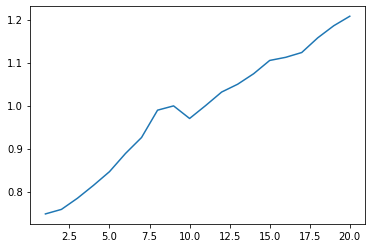

In [8]:
canada=df.loc['Canada']
x=canada.index
y=canada.values
plt.plot(x, y)

In [15]:
df = pd.DataFrame({"date":x, "value":y})

In [16]:
df

,date,value
0,1,0.748167
1,2,0.758683
2,3,0.784646
3,4,0.814550
4,5,0.846431
5,6,0.888718
6,7,0.925740
7,8,0.989326
8,9,0.999294
9,10,0.970031


In [18]:
from phase_portrait import generate_phase_portrait

In [19]:
dfg = generate_phase_portrait(df, [1])

In [20]:
x, y, xx, deriv, tt, slice_period, dates = dfg[0]

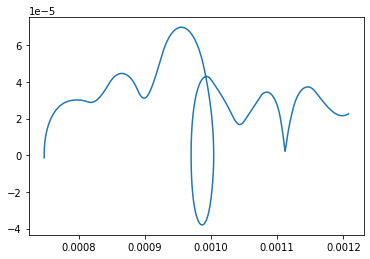

In [25]:
plt.plot()
plt.plot(deriv[0], deriv[1])

In [36]:
from scipy.interpolate import interp1d

In [37]:
step=.05
xx = np.arange(1, data_length+step, step=step)
spline = CubicSpline(x, y, bc_type='clamped')
yy=spline(xx)
ww=np.diff(yy)

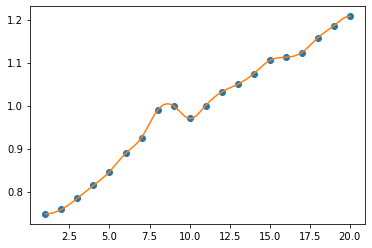

In [38]:
plt.plot(x,y,'o', xx,yy)

In [39]:
pp=[spline]
for i in range(3):
    pp.append(pp[i].derivative())
ppf=[]
for i in range(4):
    ppf.append(pp[i](xx))
t=np.linspace(1, len(ppf[0]), num=len(ppf[0]), endpoint=True)
pp1f_y=np.arange(1, len(ppf[1])+.01, step=.01)

In [40]:
interp1=lambda x: interp1d(t, x, kind='cubic',fill_value="extrapolate")(pp1f_y)
func=interp1(ppf[0])
deriv=[lambda x: x]
for i in range(1, 4):
    deriv.append(interp1(ppf[i]))

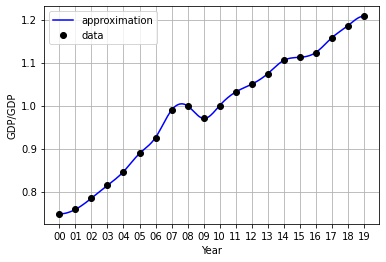

In [41]:
plt.plot(xx+1999, ppf[0], 'b', x+1999, y, 'ok')
plt.grid()
plt.legend(['approximation', 'data'], loc='best')
plt.xticks(x+1999, list(map(lambda name: (str(name)[-2:]), x+1999)))
plt.xlabel('Year');
plt.ylabel('GDP/GDP');

In [42]:
step=.0005
tt = np.arange(1, data_length+step, step=step)

In [43]:
tt.shape

(38001,)

In [44]:
from matplotlib import cm
import matplotlib as mpl
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
tt_to_years=tt+1999

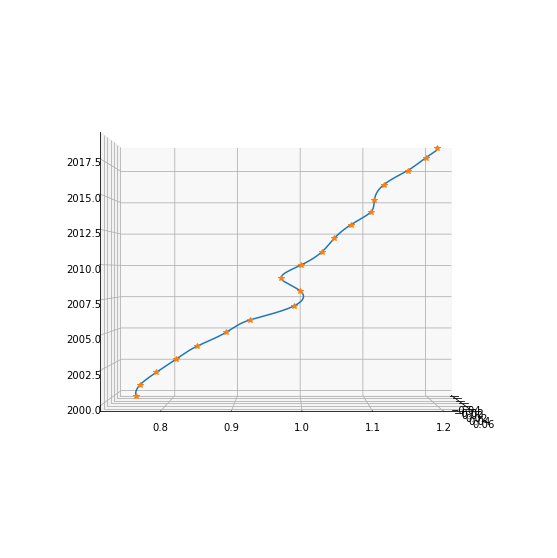

In [45]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

# norm = plt.Normalize(tt_to_years.min(), tt_to_years.max())
# cmap = plt.cm.viridis(norm)

ax.plot(deriv[1], func, tt_to_years, zdir='z')
ax.plot(deriv[1][0::2000], func[0::2000], tt_to_years[0::2000], '*', zdir='z')
# ax.view_init(-90, 0)
ax.view_init(0, 0)
fig.set_figheight(10)
fig.set_figwidth(10)

# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,tt_to_years.shape[0])))
# norm = plt.Normalize(tt_to_years.min(), tt_to_years.max())
# lc = LineCollection(np.array([deriv[1], func]).T.reshape(-1, 1, 2), cmap='viridis', norm=norm)
# lc.set_array(tt_to_years)
# lc.set_linewidth(2)
# line = ax.add_collection(lc)
# fig.colorbar(line, ax=ax)
# fig.colorbar(cm.coolwarm(np.linspace(0,1,len(tt))), ax=ax)

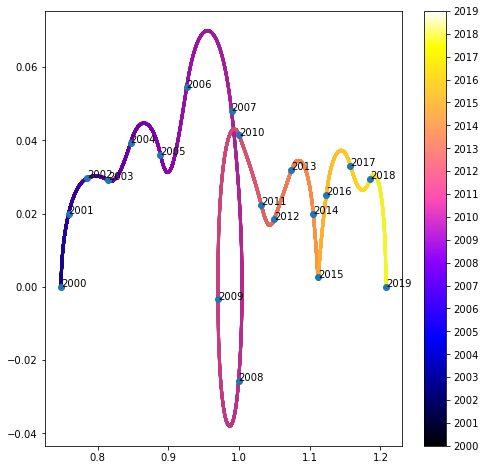

In [46]:
cmap = plt.cm.gnuplot2
years=x+1999
norm = plt.Normalize(years.min(), years.max())
# cmap = plt.cm.viridis(norm)
# cmap=cmap.reshape([4, -1])

# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,data_length)))
# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,tt_to_years.shape[0])))
c_bar=plt.cm.plasma(np.linspace(0,1,tt_to_years.shape[0]))

fig, ax = plt.subplots()
ax.scatter(func, deriv[1], c=c_bar, s=4)
cax=ax.plot(func[0::2000], deriv[1][0::2000], 'o', markersize=6)
for text, i,j in zip(x+1999, func[0::2000], deriv[1][0::2000]):
    ax.annotate(str(text),  xy=(i, j), color='black')
fig.set_figheight(8)
fig.set_figwidth(8)

# cmap = mpl.cm.viridis
# norm = mpl.colors.Normalize(tt_to_years.min(), tt_to_years.max())
# # Create an empty ScalarMappable to set the colorbar's colormap and norm.
# # The following gives a basic continuous colorbar with ticks and labels.
# fig, ax = plt.subplots()
# fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
#              cax=cax, orientation='vertical')
fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm), ticks=years, orientation='vertical')

plt.show()